--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

--- 5 Data Teratas ---
   survived  pclass     sex  

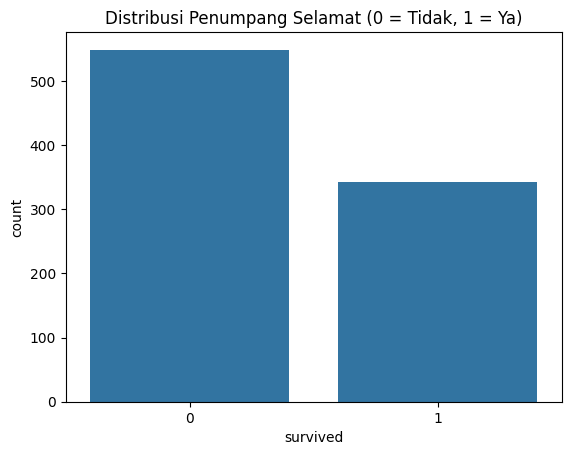


--- Missing Values ---
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

--- Data Setelah Preprocessing ---
   pclass   age  sibsp  parch     fare  sex_male  embarked_Q  embarked_S
0       3  22.0      1      0   7.2500      True       False        True
1       1  38.0      1      0  71.2833     False       False       False
2       3  26.0      0      0   7.9250     False       False        True
3       1  35.0      1      0  53.1000     False       False        True
4       3  35.0      0      0   8.0500      True       False        True

--- Melatih Model Regresi Logistik ---
Model Regresi Logistik selesai dilatih.

--- Melatih Model Decision Tree ---


/tmp/ipython-input-796015798.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = age_imputer.fit_transform(X[['age']])
/tmp/ipython-input-796015798.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['embarked'] = embarked_imputer.fit_transform(X[['embarked']])[:, 0] # Select the first column


Model Decision Tree selesai dilatih.

HASIL EVALUASI MODEL

--- 1. Regresi Logistik ---
Confusion Matrix:
 [[90 15]
 [19 55]]


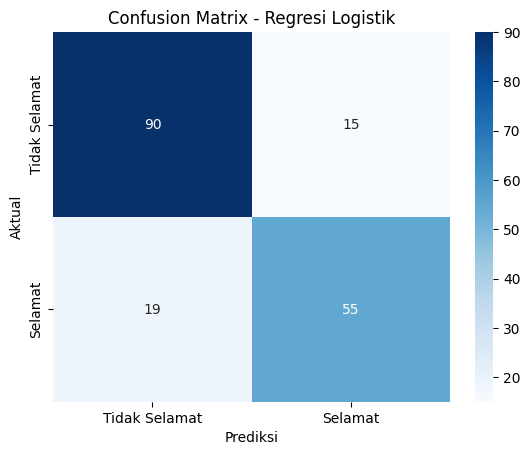


Laporan Klasifikasi (Regresi Logistik):
               precision    recall  f1-score   support

Tidak Selamat       0.83      0.86      0.84       105
      Selamat       0.79      0.74      0.76        74

     accuracy                           0.81       179
    macro avg       0.81      0.80      0.80       179
 weighted avg       0.81      0.81      0.81       179


--- 2. Decision Tree ---
Confusion Matrix:
 [[84 21]
 [18 56]]


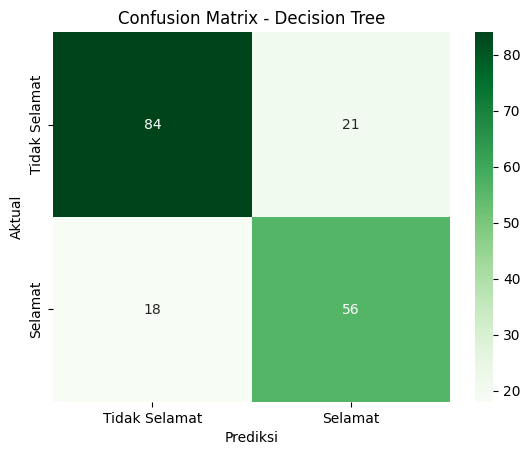


Laporan Klasifikasi (Decision Tree):
               precision    recall  f1-score   support

Tidak Selamat       0.82      0.80      0.81       105
      Selamat       0.73      0.76      0.74        74

     accuracy                           0.78       179
    macro avg       0.78      0.78      0.78       179
 weighted avg       0.78      0.78      0.78       179



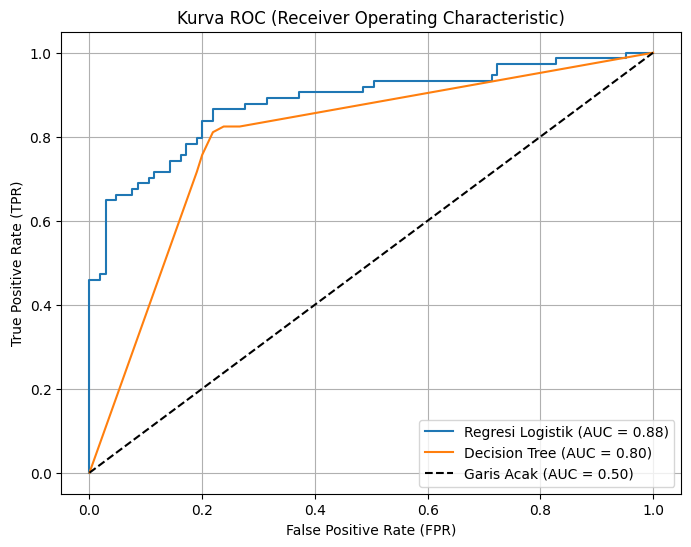


--- Tabel Perbandingan Metrik ---
              Model  Accuracy  Precision (Selamat)  Recall (Selamat)  F1-Score (Selamat)       AUC
0  Regresi Logistik  0.810056             0.785714          0.743243            0.763889  0.881982
1     Decision Tree  0.782123             0.727273          0.756757            0.741722  0.798198

--- Selesai ---


In [4]:
#Nama: Rama Achmad Fadillah, NIM: 231011402168, Kelas: 05TPLE004
#Dataset Titanic
# ---------------------------------------------------
# 1. IMPORT LIBRARY YANG DIBUTUHKAN
# ---------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Import Metrik Evaluasi
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Mengatur agar plot tampil di notebook (jika menggunakan Jupyter)
%matplotlib inline

# ---------------------------------------------------
# 2. MEMUAT DATA, EDA, DAN PREPROCESSING
# ---------------------------------------------------

# 1. Memuat Dataset
# Kita gunakan dataset 'titanic' yang tersedia di seaborn
data = sns.load_dataset('titanic')

# 2. Exploratory Data Analysis (EDA) Sederhana
print("--- Info Dataset ---")
print(data.info())
print("\n--- 5 Data Teratas ---")
print(data.head())
print("\n--- Statistik Deskriptif ---")
print(data.describe())

# Visualisasi variabel target
sns.countplot(x='survived', data=data)
plt.title('Distribusi Penumpang Selamat (0 = Tidak, 1 = Ya)')
plt.show()

# Cek missing values
print("\n--- Missing Values ---")
print(data.isnull().sum())

# 3. Preprocessing
# Memilih fitur yang akan digunakan
# Kita akan drop 'deck' (terlalu banyak missing value), 'embark_town', 'alive' (redundan), 'who', 'adult_male', 'class' (redundan dg 'pclass')
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

X = data[features]
y = data[target]

# Mengisi missing values
# 'age': isi dengan median
age_imputer = SimpleImputer(strategy='median')
X['age'] = age_imputer.fit_transform(X[['age']])

# 'embarked': isi dengan modus
embarked_imputer = SimpleImputer(strategy='most_frequent')
X['embarked'] = embarked_imputer.fit_transform(X[['embarked']])[:, 0] # Select the first column

# Encoding variabel kategorikal
# 'sex' dan 'embarked' kita ubah menggunakan one-hot encoding
X = pd.get_dummies(X, columns=['sex', 'embarked'], drop_first=True)

print("\n--- Data Setelah Preprocessing ---")
print(X.head())

# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Scaling Fitur
# Penting untuk Logistic Regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------------------------------------
# 3. MEMBANGUN MODEL
# ---------------------------------------------------

# a. Logistic Regression
print("\n--- Melatih Model Regresi Logistik ---")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1] # Probabilitas untuk kelas 1
print("Model Regresi Logistik selesai dilatih.")

# b. Decision Tree
print("\n--- Melatih Model Decision Tree ---")
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
y_prob_dec_tree = dec_tree.predict_proba(X_test)[:, 1] # Probabilitas untuk kelas 1
print("Model Decision Tree selesai dilatih.")

# ---------------------------------------------------
# 4. EVALUASI MODEL
# ---------------------------------------------------
print("\n" + "="*30)
print("HASIL EVALUASI MODEL")
print("="*30 + "\n")

# --- Evaluasi Regresi Logistik ---
print("--- 1. Regresi Logistik ---")
# a. Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix:\n", cm_log_reg)

# Visualisasi Confusion Matrix
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Selamat', 'Selamat'], yticklabels=['Tidak Selamat', 'Selamat'])
plt.title('Confusion Matrix - Regresi Logistik')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# b. Accuracy, Precision, Recall, F1-score
print("\nLaporan Klasifikasi (Regresi Logistik):")
print(classification_report(y_test, y_pred_log_reg, target_names=['Tidak Selamat', 'Selamat']))


# --- Evaluasi Decision Tree ---
print("\n--- 2. Decision Tree ---")
# a. Confusion Matrix
cm_dec_tree = confusion_matrix(y_test, y_pred_dec_tree)
print("Confusion Matrix:\n", cm_dec_tree)

# Visualisasi Confusion Matrix
sns.heatmap(cm_dec_tree, annot=True, fmt='d', cmap='Greens', xticklabels=['Tidak Selamat', 'Selamat'], yticklabels=['Tidak Selamat', 'Selamat'])
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# b. Accuracy, Precision, Recall, F1-score
print("\nLaporan Klasifikasi (Decision Tree):")
print(classification_report(y_test, y_pred_dec_tree, target_names=['Tidak Selamat', 'Selamat']))


# c. ROC Curve (Perbandingan)
# Hitung FPR, TPR untuk kedua model
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)

fpr_dec_tree, tpr_dec_tree, _ = roc_curve(y_test, y_prob_dec_tree)
auc_dec_tree = roc_auc_score(y_test, y_prob_dec_tree)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Regresi Logistik (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_dec_tree, tpr_dec_tree, label=f'Decision Tree (AUC = {auc_dec_tree:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Garis Acak (AUC = 0.50)') # Garis referensi
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Kurva ROC (Receiver Operating Characteristic)')
plt.legend()
plt.grid()
plt.show()

# ---------------------------------------------------
# 5. PERBANDINGAN DAN KESIMPULAN
# ---------------------------------------------------

# Membuat DataFrame untuk perbandingan
metrics = {
    'Model': ['Regresi Logistik', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log_reg),
        accuracy_score(y_test, y_pred_dec_tree)
    ],
    'Precision (Selamat)': [
        precision_score(y_test, y_pred_log_reg, pos_label=1),
        precision_score(y_test, y_pred_dec_tree, pos_label=1)
    ],
    'Recall (Selamat)': [
        recall_score(y_test, y_pred_log_reg, pos_label=1),
        recall_score(y_test, y_pred_dec_tree, pos_label=1)
    ],
    'F1-Score (Selamat)': [
        f1_score(y_test, y_pred_log_reg, pos_label=1),
        f1_score(y_test, y_pred_dec_tree, pos_label=1)
    ],
    'AUC': [auc_log_reg, auc_dec_tree]
}

df_metrics = pd.DataFrame(metrics)
print("\n--- Tabel Perbandingan Metrik ---")
print(df_metrics.to_string()) # .to_string() agar tampil rapi

print("\n--- Selesai ---")